# Figure 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.patches import ArrowStyle, FancyArrowPatch
from ts2vg import HorizontalVG, NaturalVG
from functions import make_directory

#plt.style.use('classic')
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.sans-serif'] = 'arial'

### Citation
The functions <code>plot_hvg</code> and <code>plot_vg</code> were taken from the <code>ts2vg</code> library:

Bergillos Varela, C. (2020). A study of visibility graphs for time series representations (Bachelor's thesis, Universitat Politècnica de Catalunya).
https://github.com/CarlosBergillos/ts2vg/blob/61a1c30a0e3b024ff6aa20111ee7997bc7311a84/docs/source/examples/plot_utils.py

In [2]:
def plot_hvg(vg, ax, edge_color=(0.25, 0.25, 0.25, 0.7),
    bar_width=0.3, prevent_overlap=False):
    
    occupied_heights = set()

    bars = ax.bar(vg.xs, vg.ts, 
                  color="#ccc", 
                  edgecolor="#000", width=bar_width)
    ax.set_xticks(vg.xs)

    for i, (n1, n2) in enumerate(vg.edges):
        y = min(vg.ts[n1], vg.ts[n2])

        if prevent_overlap:
            # very naive overlap prevention
            while round(y, 2) in occupied_heights:
                y -= 0.18

            occupied_heights.add(round(y, 2))

        if n1 < n2:
            x1, y1 = vg.xs[n1] + (bar_width / 2), y
            x2, y2 = vg.xs[n2] - (bar_width / 2), y
        else:
            x1, y1 = vg.xs[n1] - (bar_width / 2), y
            x2, y2 = vg.xs[n2] + (bar_width / 2), y

        arrow = FancyArrowPatch(
            (x1, y1),
            (x2, y2),
            arrowstyle=(
                ArrowStyle("->", head_length=6, head_width=2.5)
                if vg.is_directed
                else ArrowStyle("<->", head_length=6, head_width=2.5)
            ),
            shrinkA=0,
            shrinkB=0,
            color='blue',#edge_color,
            linewidth=1,
        )

        ax.add_patch(arrow)


def plot_nvg(vg, ax, edge_color=(0.25, 0.25, 0.25, 0.7)):
    bars = ax.bar(vg.xs, vg.ts, color="#ccc", edgecolor="#000", width=0.3)
    ax.set_xticks(vg.xs)

    for (n1, n2) in vg.edges:
        x1, y1 = vg.xs[n1], vg.ts[n1]
        x2, y2 = vg.xs[n2], vg.ts[n2]

        arrow = FancyArrowPatch(
            (x1, y1),
            (x2, y2),
            arrowstyle=ArrowStyle("->", head_length=6, head_width=2.5) if vg.is_directed else ArrowStyle("-"),
            shrinkA=0,
            shrinkB=0,
            color='blue', #edge_color,
            linewidth=1,
        )

        ax.add_patch(arrow)

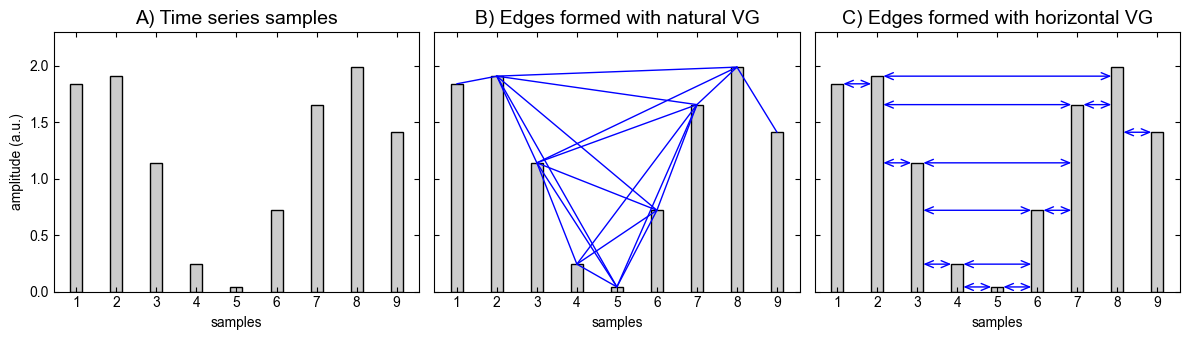

In [3]:
def plot_vg(ts): 
    fig, [ax1, ax2, ax3] = plt.subplots(ncols=3, figsize=(12, 3.5), sharey=True)
    xs = range(1, len(ts)+1)
    
    # Plot the regular time series (on axis 1)
    ax1.bar(xs, ts, color="#ccc", edgecolor="#000", width=0.3)
    ax1.set_xticks(xs)
    ax1.tick_params(right=True, top=True)
    ax1.set_xlabel('samples')
    ax1.set_ylabel('amplitude (a.u.)')
    ax1.set_title('A) Time series samples', fontsize=14)

    # Plot the natural VG (on axis 2)
    g = NaturalVG(penetrable_limit=0).build(ts)
    
    ops = {"with_labels": False, "node_size": 2, "node_color": [(0, 0, 0, 1)],
           "edge_color": [(0, 0, 0, 0.15)],}

    g.xs = range(1, len(ts)+1)
    plot_nvg(g, ax=ax2)    
    ax2.set_xlabel('samples')
    ax2.set_title('B) Edges formed with natural VG', fontsize=14)
    bottom, top = ax2.get_ylim()
    ax2.set_ylim(top= top + (abs(top-bottom))*0.1)

    # Plot the horizontal VG on axis 3
    g = HorizontalVG(penetrable_limit=0).build(ts)
    g.xs = range(1, len(ts)+1)
    plot_hvg(g, ax=ax3)
    ax3.set_xlabel('samples')
    ax3.set_title('C) Edges formed with horizontal VG', fontsize=14)

    # update figure settings
    for ax in [ax1, ax2, ax3]:
        ax.tick_params(direction='in', which='both', right=True, top=True)

    make_directory('Figure1')
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    plt.tight_layout()
    plt.savefig(f'Figure1/Figure1.pdf', bbox_inches='tight')
    plt.savefig(f'Figure1/Figure1.eps', bbox_inches='tight')
    plt.savefig(f'Figure1/Figure1.jpeg', dpi=500, bbox_inches='tight')
    plt.show()

x = np.arange(1, 10, 1)
ts = np.sin(x) + 1
plot_vg(ts)